# Student Alcohol Consumption

https://www.kaggle.com/uciml/student-alcohol-consumption

## Load Required Packages

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Load Dataset

In [6]:
dataset = pd.read_csv("student-mat.csv")

In [7]:
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [133]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

## Exploratory Data Analysis

### Missing Values

In [23]:
dataset.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

There are no missing values.

### G3 - Target Variable

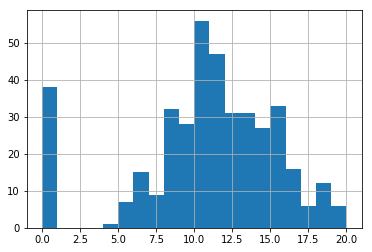

In [17]:
dataset["G3"].hist(bins=20)
plt.show()

There are some students with final grade of 0.0 - they probably have not passed the exam (classification task). Taking into account only students who passed the exam the distribution of grades is not normal, but looks promising.

### School

In [28]:
dataset["school"].value_counts()

GP    349
MS     46
Name: school, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ef5188080>,
      dtype=object)

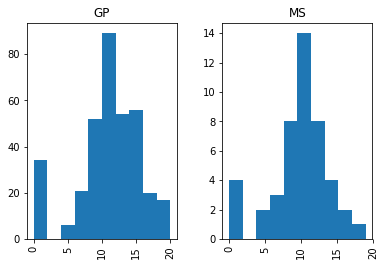

In [32]:
dataset.hist(column="G3", by="school")

The distirbution of grades for both schools are similar.

### sex

In [37]:
dataset["sex"].value_counts()

F    208
M    187
Name: sex, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ef5029f28>,
      dtype=object)

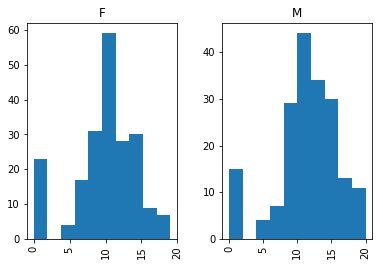

In [39]:
dataset.hist(column="G3", by="sex")

The distribution of grades for male students is shifted to the right in comparison with the distribution of grades for female studnets. On average male students get better grades.

In [46]:
dataset.groupby("sex").agg({"G3": ["mean", "std"]})

G3          
          mean       std
sex                     
F     9.966346  4.622338
M    10.914439  4.495297

### address

In [62]:
dataset["address"].value_counts()

U    307
R     88
Name: address, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ee03c1630>,
      dtype=object)

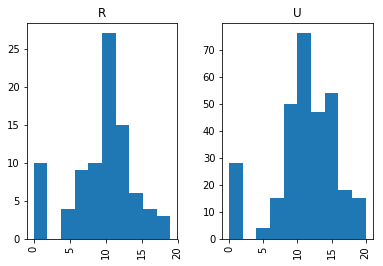

In [63]:
dataset.hist(column="G3", by="address")

In [64]:
dataset.groupby("address").agg({"G3": ["mean", "std"]})

G3          
              mean       std
address                     
R         9.511364  4.556149
U        10.674267  4.563075

The students living in urban area have on average higher final grade then the students living in rural area.

### famsize

In [66]:
dataset["famsize"].value_counts()

GT3    281
LE3    114
Name: famsize, dtype: int64

Family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2edffdcc50>,
      dtype=object)

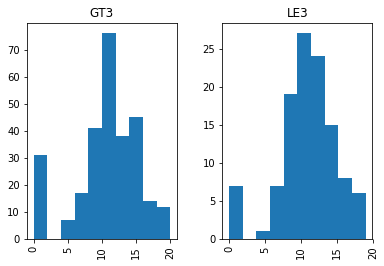

In [68]:
dataset.hist(column="G3", by="famsize")

In [73]:
dataset.groupby(["famsize"]).agg({"G3": ["mean", "std"]})

G3          
              mean       std
famsize                     
GT3      10.177936  4.704520
LE3      11.000000  4.225921

The students of larger families have on average lower grades.

In [76]:
dataset.groupby(["famsize", "address"]).agg({"G3": ["count", "mean", "std"]})

G3                     
                count       mean       std
famsize address                           
GT3     R          68   8.941176  4.458372
        U         213  10.572770  4.722548
LE3     R          20  11.450000  4.454152
        U          94  10.904255  4.194387

### Pstatus

In [81]:
dataset["Pstatus"].value_counts()

T    354
A     41
Name: Pstatus, dtype: int64

Parent's cohabitation status (binary: 'T' - living together or 'A' - living apart)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2eecf77c18>,
      dtype=object)

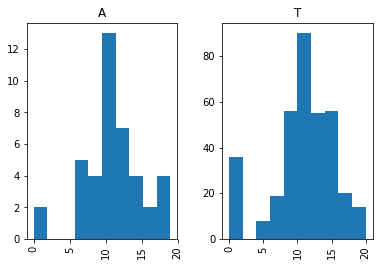

In [82]:
dataset.hist(column="G3", by="Pstatus")

In [83]:
dataset.groupby(["Pstatus"]).agg({"G3": ["mean", "std"]})

G3          
              mean       std
Pstatus                     
A        11.195122  4.290801
T        10.324859  4.611121

### Medu & Fedu

In [90]:
dataset.groupby(["Medu"]).agg({"G3": ["count", "mean", "std"]})

G3                     
     count       mean       std
Medu                           
0        3  13.000000  3.464102
1       59   8.677966  4.364594
2      103   9.728155  4.636163
3       99  10.303030  4.623486
4      131  11.763359  4.267646

In [89]:
dataset.groupby(["Fedu"]).agg({"G3": ["count", "mean", "std"]})

G3                     
     count       mean       std
Fedu                           
0        2  13.000000  4.242641
1       82   9.158537  4.563596
2      115  10.260870  4.733396
3      100  10.660000  4.149285
4       96  11.364583  4.665934

There is a clear relation between the students' final grades and their parents' education level. There is small number of observations for none education status - combine them with primary education group.

### Mjob & Fjob

In [97]:
dataset.groupby(["Mjob"]).agg({"G3": ["count", "mean", "std"]})

G3                     
         count       mean       std
Mjob                               
at_home     59   9.152542  4.733642
health      34  12.147059  4.229280
other      141   9.822695  4.359364
services   103  11.019417  4.758853
teacher     58  11.051724  4.398654

In [98]:
dataset.groupby(["Fjob"]).agg({"G3": ["count", "mean", "std"]})

G3                     
         count       mean       std
Fjob                               
at_home     20  10.150000  5.323978
health      18  11.611111  3.238353
other      217  10.193548  4.511236
services   111  10.297297  4.477407
teacher     29  11.965517  5.486885

### Others

In [103]:
dataset.groupby(["reason"]).agg({"G3": ["count", "mean", "std"]})

G3                     
           count       mean       std
reason                               
course       145   9.820690  4.878623
home         109  10.256881  4.643601
other         36  11.166667  3.760699
reputation   105  11.142857  4.261700

In [104]:
dataset.groupby(["guardian"]).agg({"G3": ["count", "mean", "std"]})

G3                     
         count       mean       std
guardian                           
father      90  10.688889  4.463697
mother     273  10.483516  4.597064
other       32   9.062500  4.689986

In [105]:
dataset.groupby(["traveltime"]).agg({"G3": ["count", "mean", "std"]})

G3                     
           count       mean       std
traveltime                           
1            257  10.782101  4.523289
2            107   9.906542  4.600108
3             23   9.260870  5.074154
4              8   8.750000  3.918819

In [106]:
dataset.groupby(["studytime"]).agg({"G3": ["count", "mean", "std"]})

G3                     
          count       mean       std
studytime                           
1           105  10.047619  4.956311
2           198  10.171717  4.217537
3            65  11.400000  4.639504
4            27  11.259259  5.281263

In [107]:
dataset.groupby(["failures"]).agg({"G3": ["count", "mean", "std"]})

G3                     
         count       mean       std
failures                           
0          312  11.253205  4.169633
1           50   8.120000  4.710561
2           17   6.235294  4.841609
3           16   5.687500  4.190764

In [108]:
dataset.groupby(["schoolsup"]).agg({"G3": ["count", "mean", "std"]})

G3                     
          count       mean       std
schoolsup                           
no          344  10.561047  4.769533
yes          51   9.431373  2.865344

In [109]:
dataset.groupby(["famsup"]).agg({"G3": ["count", "mean", "std"]})

G3                     
       count       mean       std
famsup                           
no       153  10.640523  4.636262
yes      242  10.272727  4.550318

In [110]:
dataset.groupby(["paid"]).agg({"G3": ["count", "mean", "std"]})

G3                     
     count       mean       std
paid                           
no     214   9.985981  5.126090
yes    181  10.922652  3.791011

In [111]:
dataset.groupby(["activities"]).agg({"G3": ["count", "mean", "std"]})

G3                     
           count       mean       std
activities                           
no           194  10.340206  4.488065
yes          201  10.487562  4.679861

In [114]:
dataset.groupby(["nursery"]).agg({"G3": ["count", "mean", "std"]})

G3                     
        count       mean       std
nursery                           
no         81   9.950617  4.560431
yes       314  10.535032  4.586449

In [115]:
dataset.groupby(["higher"]).agg({"G3": ["count", "mean", "std"]})

G3                  
       count    mean       std
higher                        
no        20   6.800  4.829732
yes      375  10.608  4.493422

In [116]:
dataset.groupby(["internet"]).agg({"G3": ["count", "mean", "std"]})

G3                     
         count       mean       std
internet                           
no          66   9.409091  4.485797
yes        329  10.617021  4.580494

In [117]:
dataset.groupby(["romantic"]).agg({"G3": ["count", "mean", "std"]})

G3                     
         count       mean       std
romantic                           
no         263  10.836502  4.385946
yes        132   9.575758  4.856916

In [118]:
dataset.groupby(["famrel"]).agg({"G3": ["count", "mean", "std"]})

G3                     
       count       mean       std
famrel                           
1          8  10.625000  4.838462
2         18   9.888889  5.550717
3         68  10.044118  4.647046
4        195  10.358974  4.395916
5        106  10.830189  4.733813

In [119]:
dataset.groupby(["freetime"]).agg({"G3": ["count", "mean", "std"]})

G3                     
         count       mean       std
freetime                           
1           19   9.842105  4.752346
2           64  11.562500  4.219663
3          157   9.783439  4.794920
4          115  10.426087  4.330757
5           40  11.300000  4.619912

In [120]:
dataset.groupby(["goout"]).agg({"G3": ["count", "mean", "std"]})

G3                     
      count       mean       std
goout                           
1        23   9.869565  5.336873
2       103  11.194175  4.535391
3       130  10.961538  4.210367
4        86   9.651163  4.421252
5        53   9.037736  5.072408

In [121]:
dataset.groupby(["Dalc"]).agg({"G3": ["count", "mean", "std"]})

G3                     
     count       mean       std
Dalc                           
1      276  10.731884  4.676502
2       75   9.253333  4.812970
3       26  10.500000  3.443835
4        9   9.888889  2.619372
5        9  10.666667  2.692582

In [122]:
dataset.groupby(["Walc"]).agg({"G3": ["count", "mean", "std"]})

G3                     
     count       mean       std
Walc                           
1      151  10.735099  5.133812
2       85  10.082353  4.950257
3       80  10.725000  3.700753
4       51   9.686275  3.619338
5       28  10.142857  4.125030

In [123]:
dataset.groupby(["health"]).agg({"G3": ["count", "mean", "std"]})

G3                     
       count       mean       std
health                           
1         47  11.872340  4.351996
2         45  10.222222  5.497474
3         91  10.010989  4.183286
4         66  10.106061  4.871041
5        146  10.397260  4.417020

### Continiuos predictors

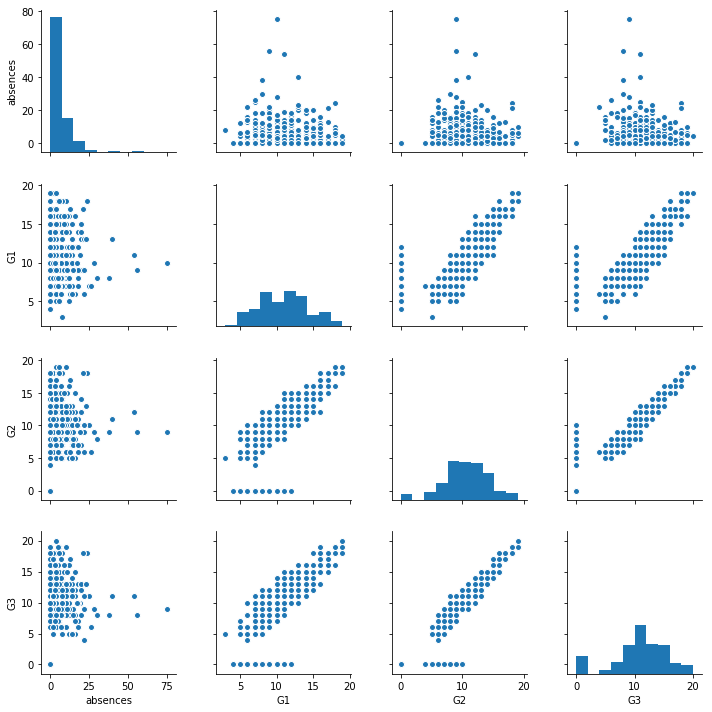

In [128]:
cols = [ "absences", "G1", "G2", "G3" ]

sns.pairplot(dataset[cols], size=2.5)
plt.tight_layout()
plt.show()

## Data Preprocessing

### One-hot encoding

In [176]:
X = pd.get_dummies(
    dataset[[
        'sex', 'address', 'famsize', 'Pstatus', 'Medu', 
        'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
        'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
        'activities', 'nursery', 'higher', 'internet', 'romantic',
        'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
        'absences', 'G1', 'G2'
    ]],
    columns = [
        "sex", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", 
        "Fjob", "reason", "guardian", "traveltime", "studytime", "failures",
        "schoolsup", "famsup", "paid", "activities", "nursery", "higher",
        "internet", "romantic", "famrel", "freetime", "goout", "Dalc", "Walc",
        "health"
    ],
    drop_first=True
)
y = dataset["G3"]

### Split training - test sample

In [177]:
y_split = pd.qcut(y, 10)

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y_split)

In [179]:
X_train.shape

(276, 69)

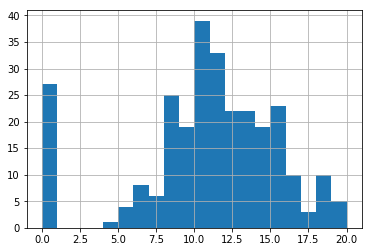

In [180]:
y_train.hist(bins=20)
plt.show()

## Model

In [181]:
slr = LinearRegression()
slr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [182]:
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [183]:
r2_score(y_train, y_train_pred)

0.8721510561720047

In [184]:
r2_score(y_test, y_test_pred)

0.7892726283554528

In [185]:
np.round(np.column_stack((y_train, y_train_pred)), 2)

array([[ 8.  ,  8.69],
       [10.  ,  9.01],
       [14.  , 14.49],
       [ 0.  ,  5.87],
       [13.  , 12.61],
       [12.  ,  9.45],
       [18.  , 17.96],
       [17.  , 15.03],
       [13.  , 14.41],
       [12.  , 10.79],
       [10.  ,  8.08],
       [14.  , 15.25],
       [12.  , 12.01],
       [11.  , 12.54],
       [ 6.  ,  6.38],
       [10.  ,  9.33],
       [ 0.  ,  0.13],
       [ 9.  ,  8.87],
       [13.  , 13.84],
       [16.  , 16.69],
       [ 0.  ,  0.41],
       [11.  , 11.67],
       [11.  , 11.55],
       [13.  , 12.23],
       [18.  , 18.59],
       [13.  , 12.44],
       [14.  , 13.82],
       [ 9.  , 11.79],
       [15.  , 13.66],
       [ 8.  ,  7.02],
       [15.  , 14.84],
       [15.  , 15.21],
       [13.  , 12.66],
       [ 5.  ,  3.76],
       [10.  ,  9.35],
       [12.  , 12.36],
       [10.  ,  8.01],
       [11.  , 10.55],
       [13.  , 13.84],
       [ 0.  ,  6.45],
       [ 8.  ,  5.45],
       [11.  , 10.12],
       [ 0.  , -0.04],
       [13.